In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Predefined plot preferences--> This is my usual plot preference

# Define text sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 26
BIGGER_SIZE = 30

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

NameError: name 'plt' is not defined

/tmp/ipython-input-2734933395.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


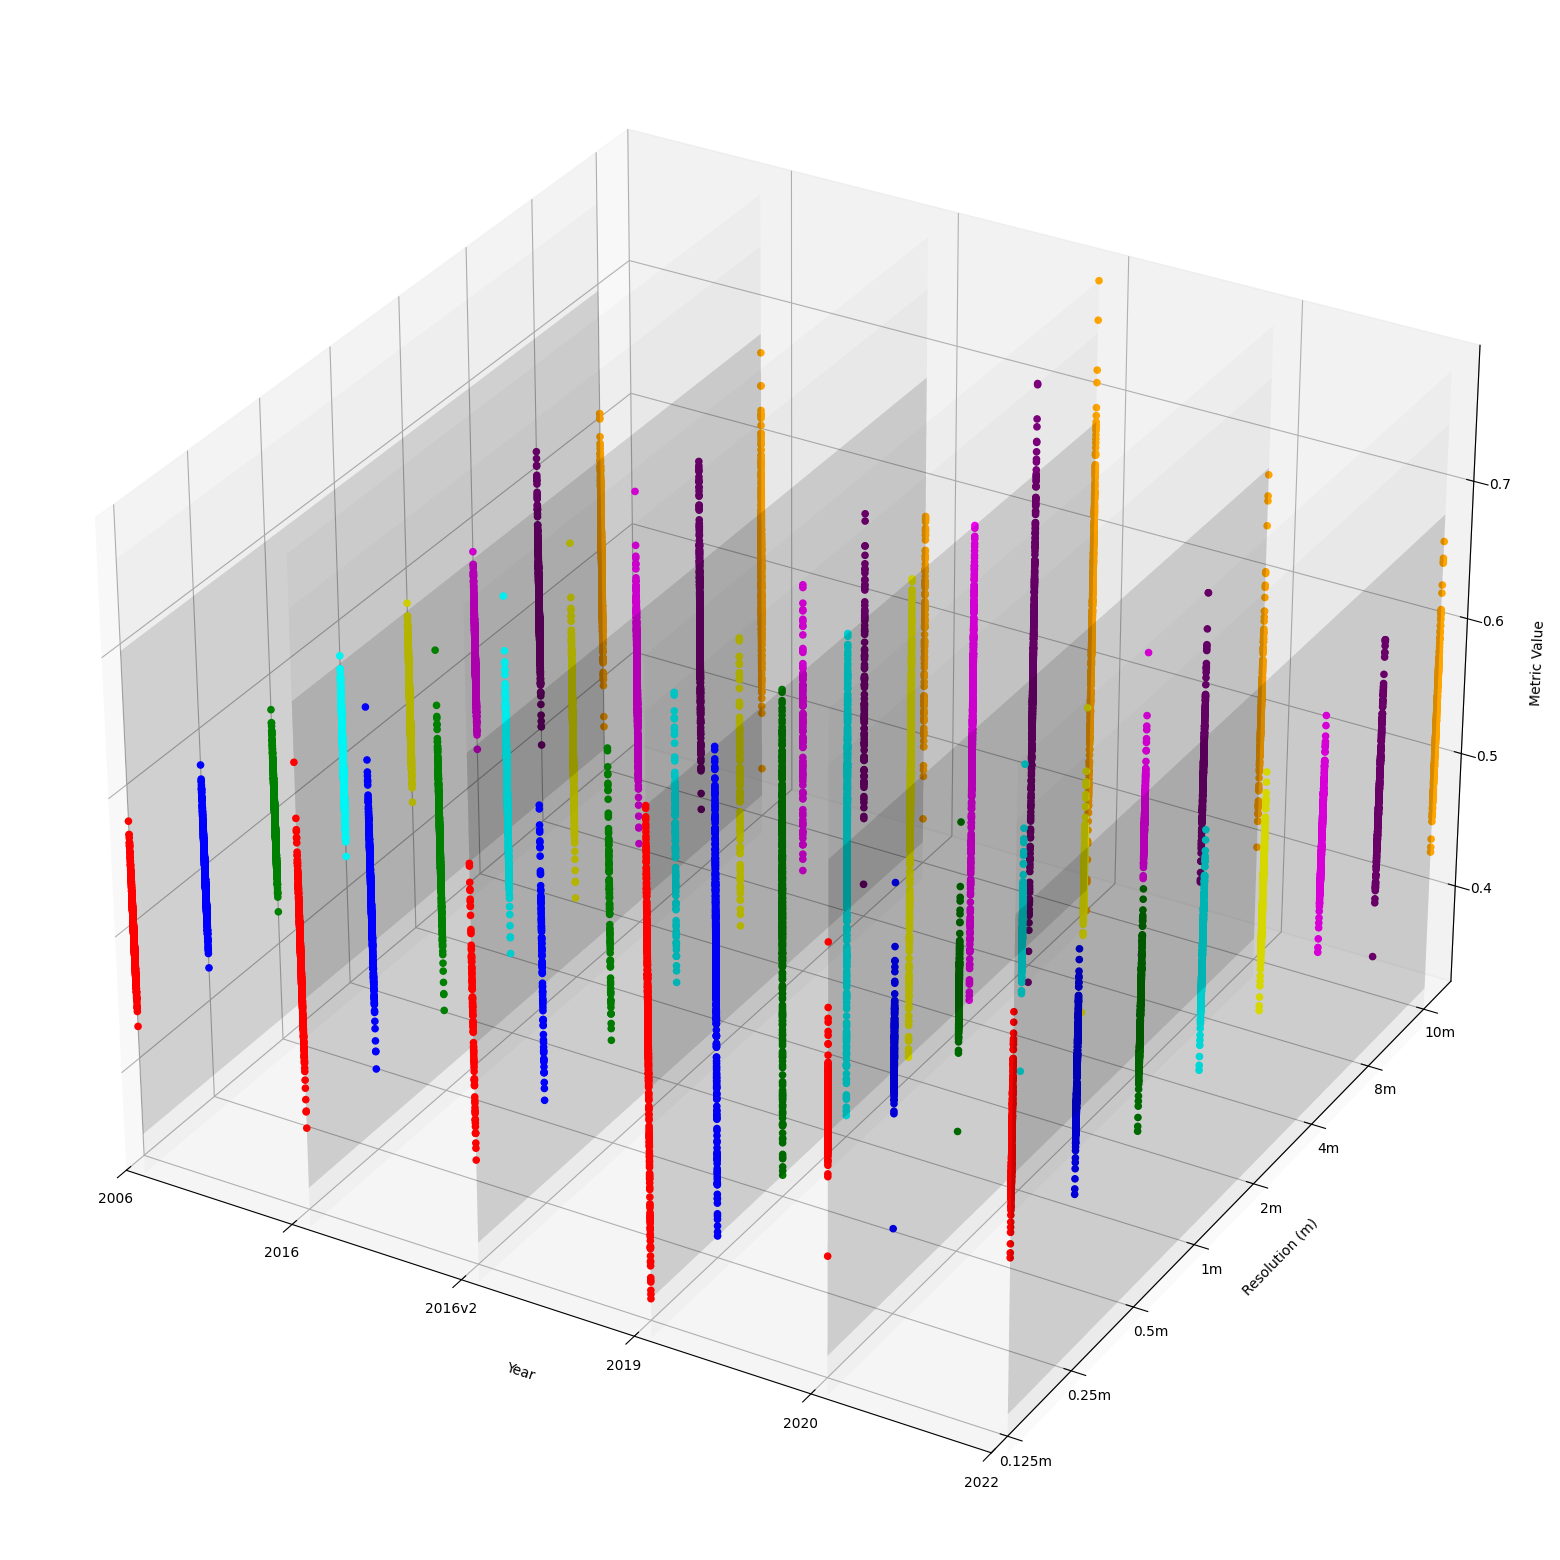

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## 3D plot

years = [2006, 2016, 2017, 2019, 2020, 2022]
metrics = ['gf']
resolutions = [0.125, 0.25, 0.5, 1, 2, 4, 8, 10]
colors = ['red', 'blue', 'green', 'cyan', 'yellow', 'magenta', 'purple', 'orange']  # horizontal

# Create a dictionary mapping the years and resolutions to evenly spaced numbers
year_mapping = {year: i for i, year in enumerate(years)}
resolution_mapping = {resolution: i for i, resolution in enumerate(resolutions)}

for metric in metrics:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    for i, (resolution, color) in enumerate(zip(resolutions, colors)):
        # Load data
        values = [
            np.loadtxt(f'/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/burns_lr/results_{resolution}m/{metric}/{metric}_{resolution}m_res_{year}')
            for year in years
        ]

        # Flatten the values and create corresponding arrays
        values_flat = np.concatenate(values)
        years_flat = np.array([year_mapping[year] for year in np.repeat(years, [len(v) for v in values])])
        resolution_flat = np.full_like(values_flat, resolution_mapping[resolution])
        ax.scatter(years_flat, resolution_flat, values_flat,
                   label=f'{metric} at {resolution}m resolution', alpha=1, color=color, s=20)

        # Vertical planes on years
        for year in years:
            xx = np.full((2, 2), year_mapping[year])
            zz, yy = np.meshgrid(np.linspace(min(values_flat), max(values_flat), 2),
                                 np.linspace(0, len(resolutions)-1, 2))
            ax.plot_surface(xx, yy, zz, alpha=0.02, color='black')

    # Axis labels
    ax.set_xlabel('\n\nYear')
    ax.set_ylabel('\n\nResolution (m)')
    ax.set_zlabel('\n\nMetric Value')

    # ----- Custom X-axis labels -----
    custom_x_labels = [str(year) for year in years]
    custom_x_labels = ["2016v2" if label == "2017" else label for label in custom_x_labels]

    ax.set_xticks(list(year_mapping.values()))
    ax.set_xticklabels(custom_x_labels)

    # ----- Custom Y-axis labels (optional: add 'm' suffix to resolutions) -----
    custom_y_labels = [f"{res}m" for res in resolutions]
    ax.set_yticks(list(resolution_mapping.values()))
    ax.set_yticklabels(custom_y_labels)

    # Tick parameters
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.tick_params(axis='z')

    # Set axis limits
    ax.set_xlim([0, len(years)-1])
    ax.set_ylim([-0.25, len(resolutions)-0.5])
    ax.set_zlim([np.min(values_flat), np.max(values_flat)])

    ax.grid(which='both', linestyle='--', alpha=0.5)

    plt.tight_layout()
    # plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/effect_of_resolution_on_GR.png', dpi=500)
    plt.show()

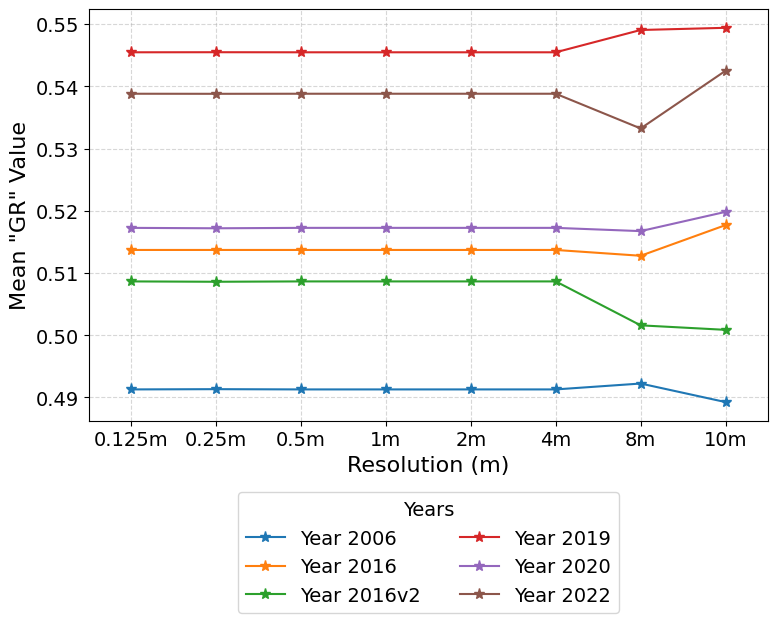

In [6]:
import matplotlib.pyplot as plt
import numpy as np

years = [2006, 2016, 2017, 2019, 2020, 2022]
metrics = ['gf']
resolutions = [0.125, 0.25, 0.5, 1, 2, 4, 8, 10]
colors = ['red', 'blue', 'green', 'cyan', 'yellow', 'magenta', 'purple', 'orange']

# Map resolutions to evenly spaced x-axis positions
resolution_mapping = {resolution: i for i, resolution in enumerate(resolutions)}

for metric in metrics:
    fig, ax = plt.subplots(figsize=(8, 7))

    # ----- Custom Year Labels for Legend -----
    # Replace 2017 with 2016v2 in the legend labels
    custom_year_labels = ["2016v2" if str(year) == "2017" else str(year) for year in years]

    # Loop over years to calculate and plot mean values for each year
    for year, color, year_label in zip(years, colors, custom_year_labels):
        mean_values = []  # To store mean values for each resolution for the current year

        # Loop over resolutions and load data for current year
        for resolution in resolutions:
            values = np.loadtxt(
                f'/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/burns_lr/results_{resolution}m/{metric}/{metric}_{resolution}m_res_{year}'
            )
            mean_values.append(np.mean(values))

        # Plot the mean values as a line for this year
        ax.plot(
            list(resolution_mapping.values()),
            mean_values,
            label=f'Year {year_label}',  # Use custom label here
            linestyle='-',
            marker='*',
            markersize=8
        )

    # ----- Axis labels -----
    ax.set_xlabel('Resolution (m)')
    ax.set_ylabel('Mean "GR" Value')

    # ----- Custom X-axis Tick Labels -----
    custom_res_labels = [f"{res}m" for res in resolutions]  # convert to strings with "m"
    ax.set_xticks(list(resolution_mapping.values()))
    ax.set_xticklabels(custom_res_labels)

    # ----- Grid and limits -----
    ax.grid(which='both', alpha=0.5, linestyle='--')
    ax.set_xlim([-0.5, len(resolutions)-0.5])

    # ----- Legend customization -----
    legend = ax.legend(
        title="Years",
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2
    )

    # Adjust layout to make room for legend
    plt.tight_layout(rect=[0, 0.05, 1, 1])
    # plt.savefig('/content/drive/MyDrive/fynbos_new_analysis_june2025/effect_of_resolution_on_GRv2.png', dpi=500, bbox_inches='tight')

    # Show plot
    plt.show()

In [ ]:
## RMSE values

high_res_vs_mid_res = 0.0     # 0.125m resolution vs 4m resolution
mid_res_vs_low_res

In [24]:
## RMSE between pair of least-mid, least-highest, mid-highest
val = [np.loadtxt(f'/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/burns_lr/results_{resolution}m/{metric}/{metric}_{resolution}m_res_{year}') for year in years]
gf_2006_res_least = [np.loadtxt(f'/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/burns_lr/results_0.125m/gf/gf_0.125m_res_2019')]
gf_2006_res_highest = [np.loadtxt(f'/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/burns_lr/results_10m/gf/gf_10m_res_2019')]
gf_2006_res_mid = [np.loadtxt(f'/content/drive/MyDrive/work_gdrive/Fynbos_SfM_analysis/burns_lr/results_4m/gf/gf_4m_res_2019')]

rmse_lm = np.sqrt(np.mean((np.array(gf_2006_res_least) - np.array(gf_2006_res_mid))**2))
rmse_lh = np.sqrt(np.mean((np.array(gf_2006_res_least) - np.array(gf_2006_res_highest))**2))
rmse_mh = np.sqrt(np.mean((np.array(gf_2006_res_mid) - np.array(gf_2006_res_highest))**2))


In [25]:
# Print RMSE values
print(f'RMSE between least-mid: {np.round(rmse_lm, 4)}')
print(f'RMSE between least-highest: {np.round(rmse_lh,4)}')
print(f'RMSE between mid-highest: {np.round(rmse_mh,4)}')

RMSE between least-mid: 0.0
RMSE between least-highest: 0.0709
RMSE between mid-highest: 0.0709
